In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(r'C:\Users\HP\Downloads\twitter_training.csv\twitter_training.csv') 


#  Data Cleaning

In [3]:
df_cleaned = df.drop(columns=['2401', 'Borderlands'])

In [4]:
# Rename columns
df_cleaned.columns = ['sentiment', 'text']

In [5]:
df_cleaned = df_cleaned.dropna(subset=['text'])

# Analyzing and visualizing sentiment patterns

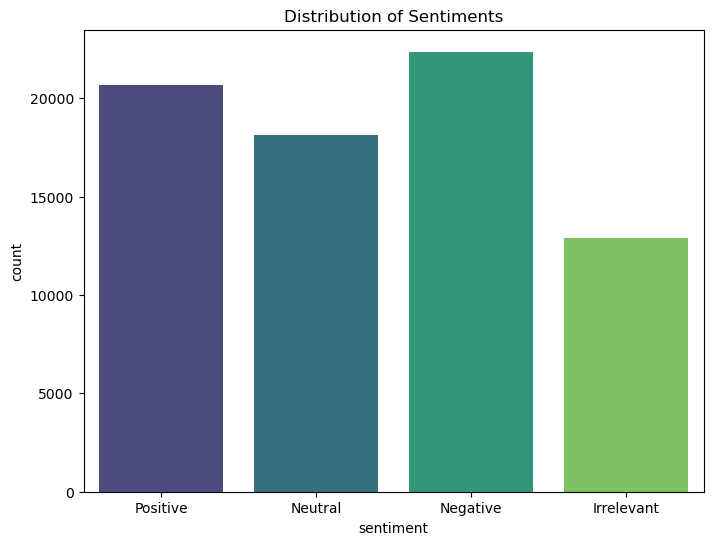

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df_cleaned, palette='viridis')
plt.title('Distribution of Sentiments')
plt.show()

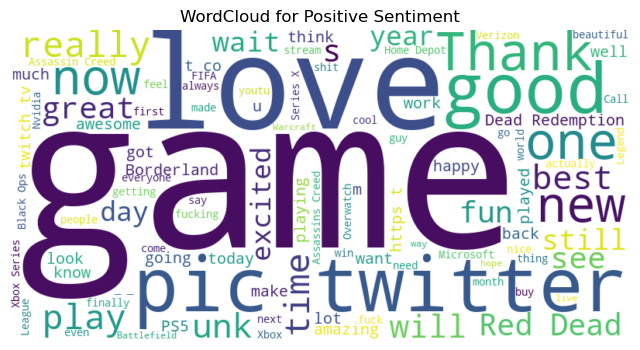

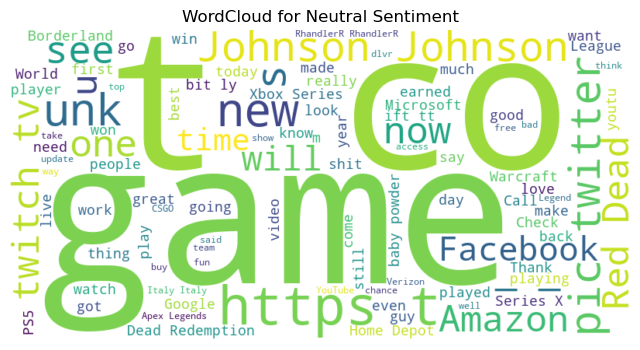

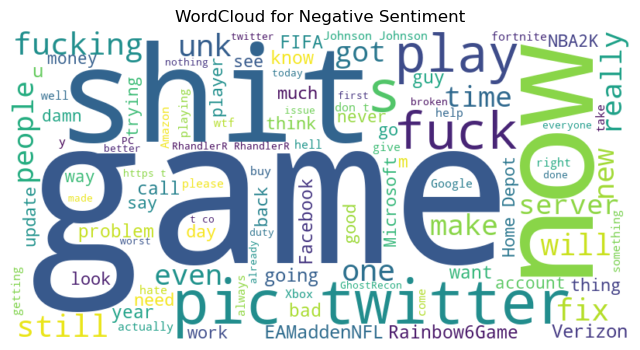

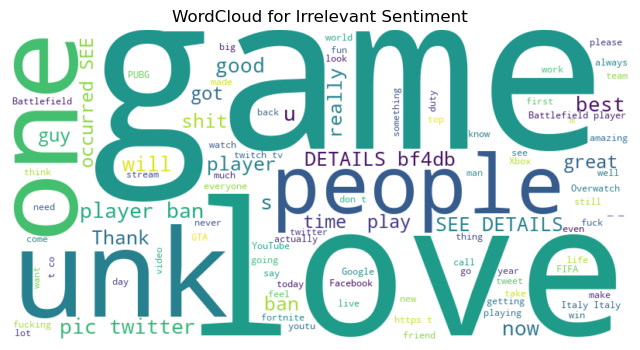

In [7]:

# Visualizing the most common words for each sentiment using WordCloud
for sentiment in df_cleaned['sentiment'].unique():
    plt.figure(figsize=(8, 6))
    sentiment_text = ' '.join(df_cleaned[df_cleaned['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(sentiment_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

In [8]:
# Text vectorization
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_cleaned['text'])
y = df_cleaned['sentiment']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [12]:
y_pred = nb.predict(X_test)

In [13]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.83      0.63      0.71      3900
    Negative       0.70      0.85      0.77      6709
     Neutral       0.82      0.65      0.73      5418
    Positive       0.72      0.80      0.76      6172

    accuracy                           0.75     22199
   macro avg       0.77      0.73      0.74     22199
weighted avg       0.76      0.75      0.75     22199

Confusion Matrix:
 [[2440  663  173  624]
 [ 154 5692  298  565]
 [ 194  957 3543  724]
 [ 157  767  293 4955]]
